In [5]:
#read first 10 rows of document
with open("transfusion.data") as f:
    for _ in range(10): # first 10 lines
        print(f.readline()) 

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"

2 ,50,12500,98 ,1

0 ,13,3250,28 ,1

1 ,16,4000,35 ,1

2 ,20,5000,45 ,1

1 ,24,6000,77 ,0

4 ,4,1000,4 ,0

2 ,7,1750,14 ,1

1 ,12,3000,35 ,0

2 ,9,2250,22 ,1



In [6]:
#imort data to program
import pandas as pd

transfusion = pd.read_csv("transfusion.data")

transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [7]:
#Data types in columns
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
#Renaming
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'aim'},
    inplace=True
)

# Print out the first 2 rows
transfusion.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),aim
0,2,50,12500,98,1
1,0,13,3250,28,1


In [10]:
transfusion.aim.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: aim, dtype: float64

In [11]:
mini = transfusion['Time (months)'].min()
maxi = transfusion['Time (months)'].max()

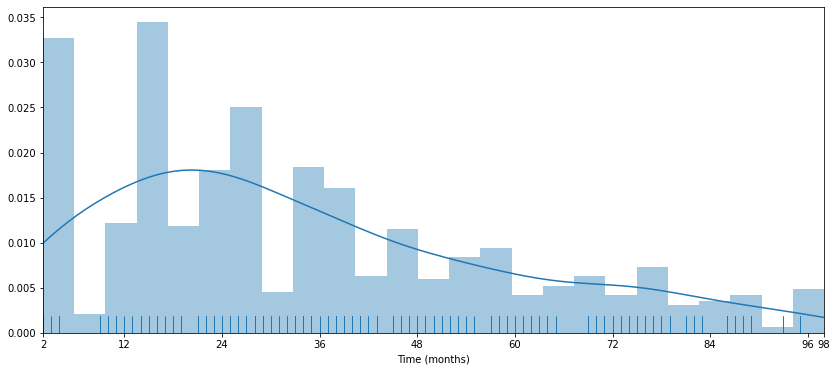

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.xlim(mini,maxi)
plt.xticks([mini,12,24,36,48,60,72,84,96,maxi])
sns.distplot(transfusion['Time (months)'],bins=25,rug=True)

In [15]:
transfusion['Frequency (times)'].value_counts().sort_values(ascending=False).head(15)

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
10     14
12     14
16     13
14     13
13      9
Name: Frequency (times), dtype: int64

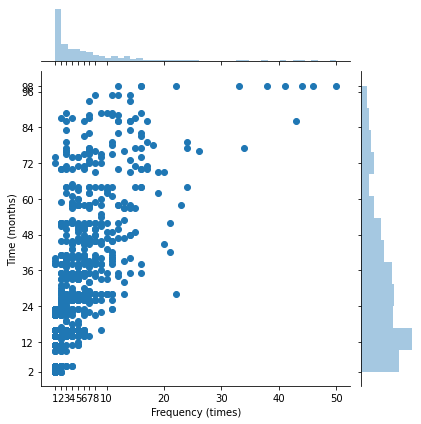

In [16]:
j = sns.jointplot(x='Frequency (times)',y='Time (months)',data=transfusion)
j.ax_joint.set_xticks([1,2,3,4,5,6,7,8,10,20,30,40,50])
j.ax_joint.set_yticks([mini,12,24,36,48,60,72,84,96,maxi])

In [17]:
transfusion[(transfusion['Frequency (times)'] == 1) & (transfusion['Time (months)'] < 25)].count()

Recency (months)         152
Frequency (times)        152
Monetary (c.c. blood)    152
Time (months)            152
aim                      152
dtype: int64

In [18]:
transfusion[(transfusion['Frequency (times)'] > 1) & (transfusion['Time (months)'] < 25) ].count()

Recency (months)         164
Frequency (times)        164
Monetary (c.c. blood)    164
Time (months)            164
aim                      164
dtype: int64

In [19]:
transfusion[(transfusion['Frequency (times)'] > 1) & (transfusion['Time (months)'] < 25) & (transfusion['aim']==1)].count()

Recency (months)         53
Frequency (times)        53
Monetary (c.c. blood)    53
Time (months)            53
aim                      53
dtype: int64

In [20]:
transfusion[(transfusion['Frequency (times)'] > 7) & (transfusion['Time (months)'] < 25) ].count()

Recency (months)         5
Frequency (times)        5
Monetary (c.c. blood)    5
Time (months)            5
aim                      5
dtype: int64

In [21]:
transfusion[(transfusion['Frequency (times)'] > 7) & (transfusion['Time (months)'] < 25) & (transfusion['aim']==1)].count()

Recency (months)         1
Frequency (times)        1
Monetary (c.c. blood)    1
Time (months)            1
aim                      1
dtype: int64

In [22]:
transfusion[(transfusion['Recency (months)'] > 3) & (transfusion['aim']==1)].count()

Recency (months)         103
Frequency (times)        103
Monetary (c.c. blood)    103
Time (months)            103
aim                      103
dtype: int64

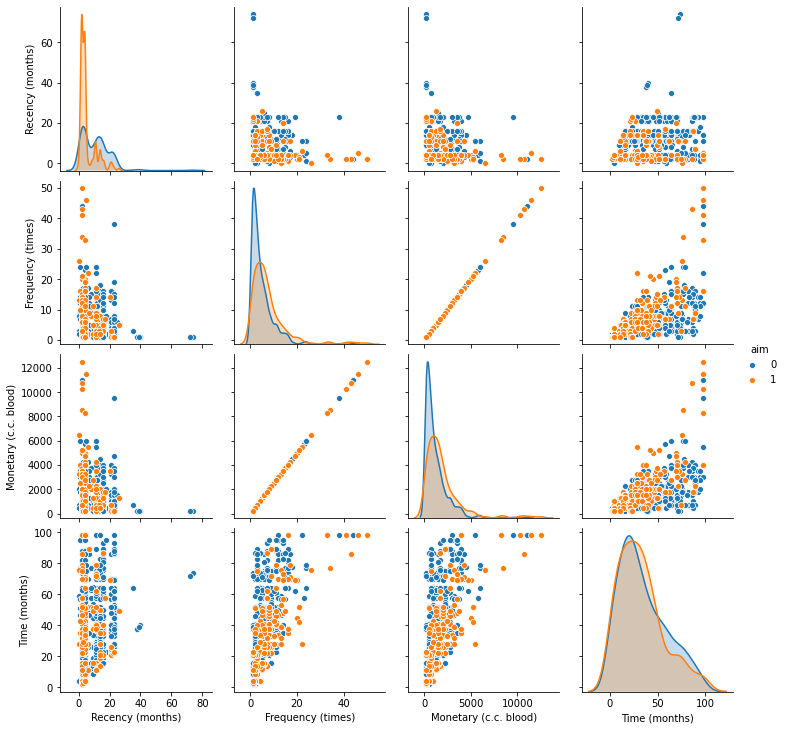

In [23]:
sns.pairplot(data=transfusion,hue='aim')

In [25]:
from sklearn.preprocessing import StandardScaler

data = transfusion[['Recency (months)', 'Frequency (times)', 'Time (months)']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [29]:
import pandas as pd

scaled_data = pd.DataFrame(scaled_data)
scaled_data['aim'] = transfusion.iloc[:,4]

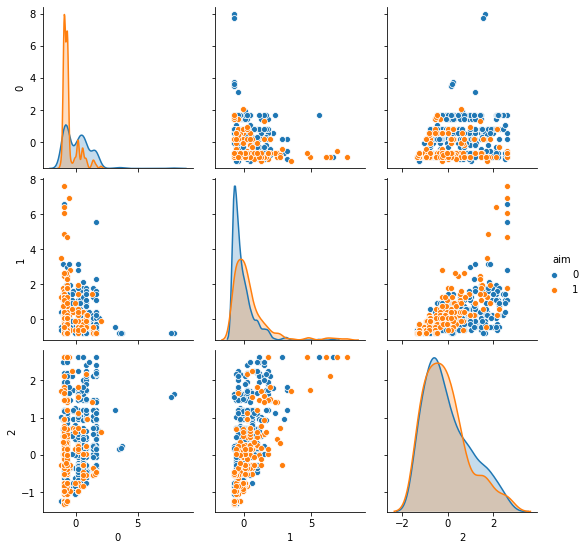

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(scaled_data, hue='aim')

In [59]:
scaled_data

,0,1,2,aim
0,-0.927899,7.623346,2.615633,1
1,-1.175118,1.282738,-0.257881,1
2,-1.051508,1.796842,0.029471,1
3,-0.927899,2.482313,0.439973,1
4,-1.051508,3.167784,1.753579,0
...,...,...,...,...
743,1.667904,-0.602307,0.152621,0
744,1.420685,-0.602307,0.727324,0
745,1.667904,-0.430940,1.137826,0
746,3.645659,-0.773675,0.193671,0


In [34]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    scaled_data.drop(columns='aim'),
    scaled_data.aim,
    test_size=0.25,
    random_state=545
)

data_train.head(2)

,0,1,2
224,-0.680679,-0.773675,-1.243086
718,1.420685,-0.430940,0.029471


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.layers import Dropout

#set seed for reproduction purpose
from numpy.random import seed
seed(1) 

import tensorflow
tensorflow.random.set_seed(2)

import random as rn
rn.seed(12345)

import tensorflow as tf
tf.random.set_seed(1234)

#import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
neural_model = Sequential([
    Dense(10, input_shape=(3,), activation="relu"),
    Dropout(0.2),
    Dense(5, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

#show summary of a model
neural_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dropout_9 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [48]:
neural_model.compile(SGD(lr = .003), "binary_crossentropy", \
                     metrics=["accuracy"])

np.random.seed(0)
run_hist_1 = neural_model.fit(data_train, target_train, epochs=200,\
                              validation_data=(data_test, target_test), \
                              verbose=True, shuffle=False)

print("Training neural network...\n")

print('Accuracy over training data is ', \
      accuracy_score(target_train, neural_model.predict_classes(data_train)))

print('Accuracy over testing data is ', \
      accuracy_score(target_test, neural_model.predict_classes(data_test)))

conf_matrix = confusion_matrix(target_test, neural_model.predict_classes(data_test))
print(conf_matrix)

Epoch 1/200
18/18 [==============================] - 1s 29ms/step - loss: 0.7731 - accuracy: 0.4381 - val_loss: 0.7455 - val_accuracy: 0.4652
Epoch 2/200
18/18 [==============================] - 0s 8ms/step - loss: 0.7572 - accuracy: 0.4714 - val_loss: 0.7309 - val_accuracy: 0.4920
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 0.7512 - accuracy: 0.4727 - val_loss: 0.7176 - val_accuracy: 0.5294
Epoch 4/200
18/18 [==============================] - 0s 8ms/step - loss: 0.7413 - accuracy: 0.5346 - val_loss: 0.7059 - val_accuracy: 0.5615
Epoch 5/200
18/18 [==============================] - 0s 7ms/step - loss: 0.7078 - accuracy: 0.5725 - val_loss: 0.6956 - val_accuracy: 0.6203
Epoch 6/200
18/18 [==============================] - 0s 8ms/step - loss: 0.7065 - accuracy: 0.5877 - val_loss: 0.6859 - val_accuracy: 0.6364
Epoch 7/200
18/18 [==============================] - 0s 7ms/step - loss: 0.7007 - accuracy: 0.5937 - val_loss: 0.6774 - val_accuracy: 0.6845
Epoch 8/200


Epoch 59/200
18/18 [==============================] - 0s 10ms/step - loss: 0.5505 - accuracy: 0.7861 - val_loss: 0.5748 - val_accuracy: 0.7433
Epoch 60/200
18/18 [==============================] - 0s 9ms/step - loss: 0.5501 - accuracy: 0.7732 - val_loss: 0.5741 - val_accuracy: 0.7433
Epoch 61/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5519 - accuracy: 0.7814 - val_loss: 0.5735 - val_accuracy: 0.7433
Epoch 62/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5501 - accuracy: 0.7764 - val_loss: 0.5730 - val_accuracy: 0.7433
Epoch 63/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5454 - accuracy: 0.7820 - val_loss: 0.5723 - val_accuracy: 0.7433
Epoch 64/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5561 - accuracy: 0.7774 - val_loss: 0.5718 - val_accuracy: 0.7433
Epoch 65/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5480 - accuracy: 0.7782 - val_loss: 0.5714 - val_accuracy: 0.7433
Epoch

18/18 [==============================] - 0s 6ms/step - loss: 0.5183 - accuracy: 0.7820 - val_loss: 0.5531 - val_accuracy: 0.7433
Epoch 117/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5237 - accuracy: 0.7788 - val_loss: 0.5530 - val_accuracy: 0.7433
Epoch 118/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5165 - accuracy: 0.7794 - val_loss: 0.5526 - val_accuracy: 0.7433
Epoch 119/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5267 - accuracy: 0.7781 - val_loss: 0.5525 - val_accuracy: 0.7433
Epoch 120/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5107 - accuracy: 0.7865 - val_loss: 0.5523 - val_accuracy: 0.7433
Epoch 121/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5221 - accuracy: 0.7784 - val_loss: 0.5522 - val_accuracy: 0.7433
Epoch 122/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5196 - accuracy: 0.7777 - val_loss: 0.5520 - val_accuracy: 0.7433
Epoch 123/200

18/18 [==============================] - 0s 6ms/step - loss: 0.5055 - accuracy: 0.7868 - val_loss: 0.5414 - val_accuracy: 0.7433
Epoch 174/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5000 - accuracy: 0.7855 - val_loss: 0.5411 - val_accuracy: 0.7433
Epoch 175/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5120 - accuracy: 0.7842 - val_loss: 0.5408 - val_accuracy: 0.7433
Epoch 176/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5043 - accuracy: 0.7791 - val_loss: 0.5406 - val_accuracy: 0.7433
Epoch 177/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5152 - accuracy: 0.7794 - val_loss: 0.5404 - val_accuracy: 0.7433
Epoch 178/200
18/18 [==============================] - 0s 11ms/step - loss: 0.5017 - accuracy: 0.7872 - val_loss: 0.5402 - val_accuracy: 0.7487
Epoch 179/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5036 - accuracy: 0.7801 - val_loss: 0.5398 - val_accuracy: 0.7487
Epoch 180/20

C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy over training data is  0.7843137254901961
Accuracy over testing data is  0.7486631016042781


C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

[[136   1]
 [ 46   4]]


In [49]:
conf_matrix = confusion_matrix(target_test, neural_model.predict_classes(data_test))
print(conf_matrix)

[[136   1]
 [ 46   4]]


C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


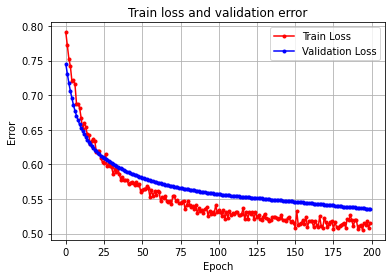

In [51]:
#run_hist_1.history.keys()

plt.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
axes = plt.gca()
plt.title("Train loss and validation error")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Error')
plt.grid()

In [52]:
neural_model = Sequential([
    Dense(10, input_shape=(3,), activation="selu"),
    Dropout(0.2),
    Dense(5, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

#show summary of a model
neural_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                40        
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 55        
_________________________________________________________________
dropout_11 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [53]:
neural_model.compile(SGD(lr = .003), "binary_crossentropy", \
                     metrics=["accuracy"])

np.random.seed(0)
run_hist_1 = neural_model.fit(data_train, target_train, epochs=200,\
                              validation_data=(data_test, target_test), \
                              verbose=True, shuffle=False)

print("Training neural network...\n")

print('Accuracy over training data is ', \
      accuracy_score(target_train, neural_model.predict_classes(data_train)))

print('Accuracy over testing data is ', \
      accuracy_score(target_test, neural_model.predict_classes(data_test)))

conf_matrix = confusion_matrix(target_test, neural_model.predict_classes(data_test))
print(conf_matrix)

Epoch 1/200
18/18 [==============================] - 1s 29ms/step - loss: 0.9087 - accuracy: 0.3250 - val_loss: 0.8418 - val_accuracy: 0.3102
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.8582 - accuracy: 0.3654 - val_loss: 0.8143 - val_accuracy: 0.3797
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.8398 - accuracy: 0.4010 - val_loss: 0.7891 - val_accuracy: 0.4545
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.8119 - accuracy: 0.4143 - val_loss: 0.7675 - val_accuracy: 0.4973
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.8021 - accuracy: 0.4626 - val_loss: 0.7481 - val_accuracy: 0.5241
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7892 - accuracy: 0.4143 - val_loss: 0.7310 - val_accuracy: 0.5294
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7470 - accuracy: 0.5116 - val_loss: 0.7164 - val_accuracy: 0.5455
Epoch 8/200


Epoch 59/200
18/18 [==============================] - 0s 7ms/step - loss: 0.4971 - accuracy: 0.7951 - val_loss: 0.5139 - val_accuracy: 0.7433
Epoch 60/200
18/18 [==============================] - 0s 8ms/step - loss: 0.4996 - accuracy: 0.7869 - val_loss: 0.5133 - val_accuracy: 0.7433
Epoch 61/200
18/18 [==============================] - 0s 7ms/step - loss: 0.4999 - accuracy: 0.7876 - val_loss: 0.5126 - val_accuracy: 0.7433
Epoch 62/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5119 - accuracy: 0.7755 - val_loss: 0.5119 - val_accuracy: 0.7433
Epoch 63/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5176 - accuracy: 0.7822 - val_loss: 0.5114 - val_accuracy: 0.7433
Epoch 64/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5231 - accuracy: 0.7746 - val_loss: 0.5107 - val_accuracy: 0.7433
Epoch 65/200
18/18 [==============================] - 0s 7ms/step - loss: 0.4959 - accuracy: 0.7794 - val_loss: 0.5101 - val_accuracy: 0.7433
Epoch 

18/18 [==============================] - 0s 6ms/step - loss: 0.4848 - accuracy: 0.7914 - val_loss: 0.4961 - val_accuracy: 0.7433
Epoch 117/200
18/18 [==============================] - 0s 7ms/step - loss: 0.4984 - accuracy: 0.7895 - val_loss: 0.4960 - val_accuracy: 0.7433
Epoch 118/200
18/18 [==============================] - 0s 7ms/step - loss: 0.4869 - accuracy: 0.7731 - val_loss: 0.4959 - val_accuracy: 0.7433
Epoch 119/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4867 - accuracy: 0.7819 - val_loss: 0.4958 - val_accuracy: 0.7433
Epoch 120/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4963 - accuracy: 0.7639 - val_loss: 0.4957 - val_accuracy: 0.7433
Epoch 121/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4779 - accuracy: 0.7752 - val_loss: 0.4955 - val_accuracy: 0.7433
Epoch 122/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.8023 - val_loss: 0.4954 - val_accuracy: 0.7433
Epoch 123/200

18/18 [==============================] - 0s 6ms/step - loss: 0.4813 - accuracy: 0.7914 - val_loss: 0.4922 - val_accuracy: 0.7433
Epoch 174/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4687 - accuracy: 0.7742 - val_loss: 0.4922 - val_accuracy: 0.7433
Epoch 175/200
18/18 [==============================] - 0s 7ms/step - loss: 0.4969 - accuracy: 0.7930 - val_loss: 0.4922 - val_accuracy: 0.7433
Epoch 176/200
18/18 [==============================] - 0s 9ms/step - loss: 0.4790 - accuracy: 0.7926 - val_loss: 0.4922 - val_accuracy: 0.7433
Epoch 177/200
18/18 [==============================] - 0s 7ms/step - loss: 0.4683 - accuracy: 0.7807 - val_loss: 0.4921 - val_accuracy: 0.7433
Epoch 178/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4721 - accuracy: 0.8027 - val_loss: 0.4920 - val_accuracy: 0.7433
Epoch 179/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4854 - accuracy: 0.7858 - val_loss: 0.4920 - val_accuracy: 0.7433
Epoch 180/200

C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy over training data is  0.7807486631016043
Accuracy over testing data is  0.7433155080213903
[[133   4]
 [ 44   6]]

C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

In [54]:
conf_matrix = confusion_matrix(target_test, neural_model.predict_classes(data_test))
print(conf_matrix)

[[133   4]
 [ 44   6]]


C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [55]:
print('Accuracy over training data is ', \
      accuracy_score(target_train, neural_model.predict_classes(data_train)))

print('Accuracy over testing data is ', \
      accuracy_score(target_test, neural_model.predict_classes(data_test)))

C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

Accuracy over training data is  0.7807486631016043
Accuracy over testing data is  0.7433155080213903


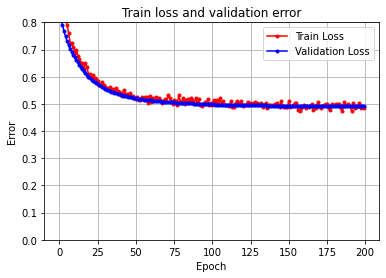

In [56]:
#run_hist_1.history.keys()

plt.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
axes = plt.gca()
axes.set_ylim([0,0.8])
plt.title("Train loss and validation error")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Error')
plt.grid()